In [7]:
import glob
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [6]:
df = pd.read_csv('../data/train.csv')
df.head()

,id,img_path,artist
0,0,./train/0000.jpg,Diego Velazquez
1,1,./train/0001.jpg,Vincent van Gogh
2,2,./train/0002.jpg,Claude Monet
3,3,./train/0003.jpg,Edgar Degas
4,4,./train/0004.jpg,Hieronymus Bosch


In [11]:
h_lst = []
w_lst = []
for i in range(len(df)):
    img = cv2.imread(os.path.join('../data', df['img_path'][i]))
    h, w, _ = img.shape
    h_lst.append(h)
    w_lst.append(w)
df['w'] = w_lst
df['h'] = h_lst
df.head()


,id,img_path,artist,w,h
0,0,./train/0000.jpg,Diego Velazquez,1024,1300
1,1,./train/0001.jpg,Vincent van Gogh,568,1024
2,2,./train/0002.jpg,Claude Monet,1024,722
3,3,./train/0003.jpg,Edgar Degas,1053,836
4,4,./train/0004.jpg,Hieronymus Bosch,782,845


In [19]:
len(df['artist'].unique())

50

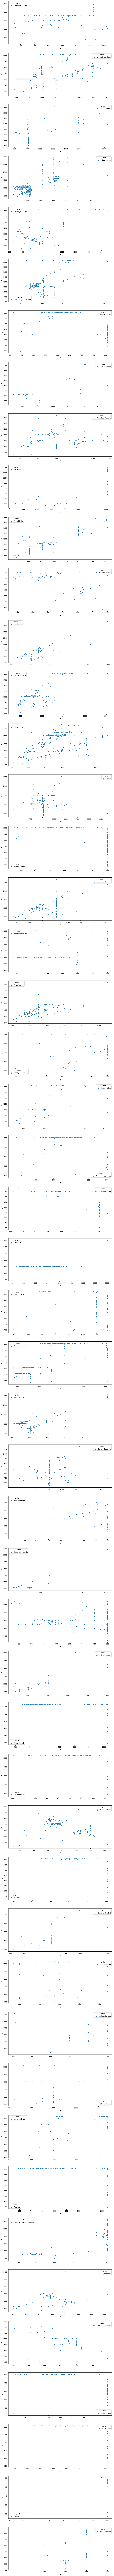

In [39]:
fig, axes = plt.subplots(50, 1, figsize=(12, 300))
for idx, name in enumerate(df['artist'].unique()):
    df_tmp = df[df['artist']==name]
    sns.scatterplot(
        data=df_tmp,
        x='w',
        y='h',
        hue='artist',
        ax=axes[idx]
    )